In [96]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
np.random.seed(42)


In [98]:
df = pd.read_csv('Данные.csv', sep=';')

In [99]:
df.head()

,k,lu,P0,I,gamma,sgamma,r,Psat,Lsat,loptim,lres,loptim/lres,Psat/Pall,Lsat/lu,f,rho,P0/Pall
0,3.89,3.69,12800000.0,80.0,2650.0,0.0,0.0001,1.430000e+08,18.5,2.261250e-08,2.257770e-08,0.001542,0.00132,5.01,0.736,0.000965,1.180000e-04
1,3.89,3.69,12800.0,80.0,1000.0,0.0,0.0001,9.800000e+07,16.7,1.585280e-07,1.580440e-07,0.003065,0.00240,4.52,0.736,0.002550,3.130000e-07
2,3.98,3.69,150000.0,500.0,2830.0,0.0,0.0001,1.130000e+09,20.3,2.061380e-08,2.057220e-08,0.002024,0.00156,5.49,0.735,0.001690,2.070000e-07
3,3.98,3.69,1500000.0,500.0,3160.0,0.0,0.0001,1.100000e+09,18.3,1.648760e-08,1.645770e-08,0.001814,0.00136,4.96,0.735,0.001510,1.850000e-06
4,3.98,3.69,150000.0,500.0,2650.0,0.0,0.0001,1.180000e+09,19.4,2.356200e-08,2.351110e-08,0.002164,0.00175,5.25,0.735,0.001800,2.210000e-07


In [100]:
df = df.dropna()

In [101]:
df

,k,lu,P0,I,gamma,sgamma,r,Psat,Lsat,loptim,lres,loptim/lres,Psat/Pall,Lsat/lu,f,rho,P0/Pall
0,3.89,3.69,12800000.0,80.0,2650.0,0.00000,0.00010,1.430000e+08,18.5,2.261250e-08,2.257770e-08,0.001542,0.001320,5.01,0.736,0.000965,1.180000e-04
1,3.89,3.69,12800.0,80.0,1000.0,0.00000,0.00010,9.800000e+07,16.7,1.585280e-07,1.580440e-07,0.003065,0.002400,4.52,0.736,0.002550,3.130000e-07
2,3.98,3.69,150000.0,500.0,2830.0,0.00000,0.00010,1.130000e+09,20.3,2.061380e-08,2.057220e-08,0.002024,0.001560,5.49,0.735,0.001690,2.070000e-07
3,3.98,3.69,1500000.0,500.0,3160.0,0.00000,0.00010,1.100000e+09,18.3,1.648760e-08,1.645770e-08,0.001814,0.001360,4.96,0.735,0.001510,1.850000e-06
4,3.98,3.69,150000.0,500.0,2650.0,0.00000,0.00010,1.180000e+09,19.4,2.356200e-08,2.351110e-08,0.002164,0.001750,5.25,0.735,0.001800,2.210000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,1.72,1.99,9900000.0,7600.0,29000.0,0.00005,0.00001,5.600000e+10,21.1,2.935000e-11,2.933180e-11,0.000621,0.000497,10.60,0.830,0.000777,8.790000e-08
1878,1.72,1.99,990000000.0,7600.0,26000.0,0.00005,0.00001,8.440000e+10,12.4,3.652910e-11,3.649120e-11,0.001039,0.000836,6.23,0.830,0.000867,9.810000e-06
1879,3.29,1.99,759000000.0,4500.0,33000.0,0.00005,0.00001,6.090000e+10,13.4,5.864380e-11,5.858580e-11,0.000991,0.000803,6.73,0.750,0.000825,1.000000e-05
1880,3.29,1.99,759000000.0,4500.0,38000.0,0.00005,0.00001,6.090000e+10,15.2,4.422070e-11,4.418280e-11,0.000859,0.000697,7.65,0.750,0.000717,8.680000e-06


Look at the power distribution. 

Text(0.5, 1.0, 'Power hist')

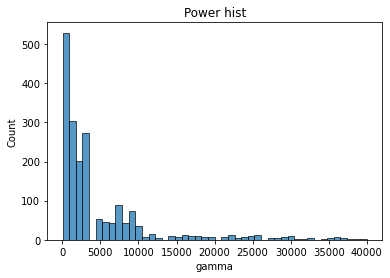

In [102]:
sns.histplot(df, x='gamma')
plt.title("Power hist")

Text(0.5, 1.0, 'Power hist')

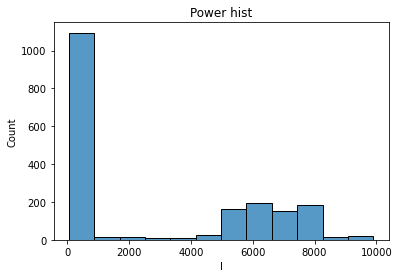

In [103]:
sns.histplot(df, x='I')
plt.title("Power hist")

Delete all the blowout(rho>0.012) 

In [104]:
df = df[df['Psat/Pall']<0.008]

Text(0.5, 1.0, 'Power hist')

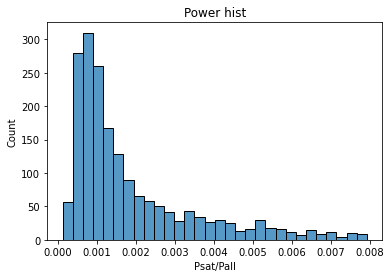

In [105]:
sns.histplot(df, x='Psat/Pall')
plt.title("Power hist")

Create a new feature log(Psat/Pall)

In [106]:
df['log'] = np.log(df[['Psat/Pall']])
df['log0'] = np.log(df['P0']/df['I']/df['gamma']/511000)
df['optim'] = df['loptim/lres']/df['Psat/Pall']
df['gamma'] = np.log(df['gamma'])
df = df[df['optim']<=2]

C:\Users\user\AppData\Local\Temp\ipykernel_8376\589933877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log'] = np.log(df[['Psat/Pall']])
C:\Users\user\AppData\Local\Temp\ipykernel_8376\589933877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log0'] = np.log(df['P0']/df['I']/df['gamma']/511000)
C:\Users\user\AppData\Local\Temp\ipykernel_8376\589933877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Text(0.5, 1.0, 'Power hist')

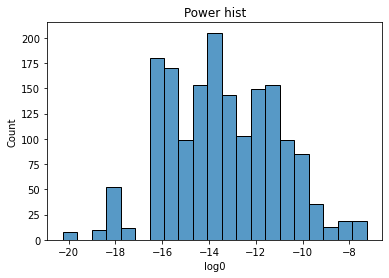

In [107]:
sns.histplot(df, x='log0')
plt.title("Power hist")

Text(0.5, 1.0, 'Power hist')

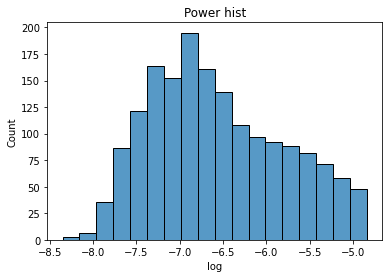

In [108]:
sns.histplot(df, x='log')
plt.title("Power hist")

Text(0.5, 1.0, 'L_sat hist')

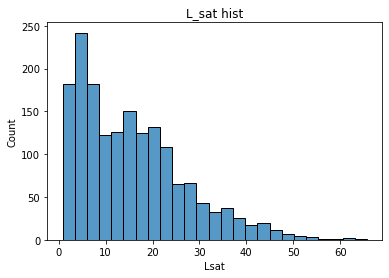

In [109]:
sns.histplot(df, x='Lsat')
plt.title("L_sat hist")

Text(0.5, 1.0, 'L_sat hist')

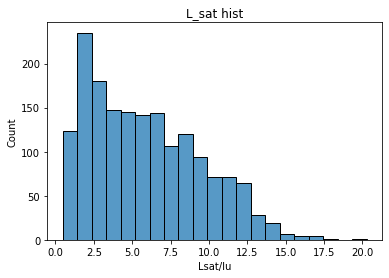

In [110]:
sns.histplot(df, x='Lsat/lu')
plt.title("L_sat hist")

Text(0.5, 1.0, 'lambda')

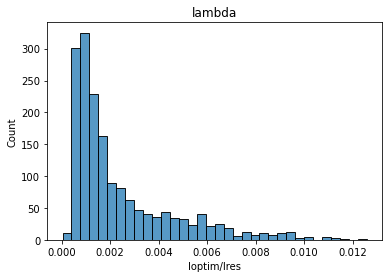

In [111]:
sns.histplot(df, x='loptim/lres')
plt.title("lambda")

Text(0.5, 1.0, 'rho')

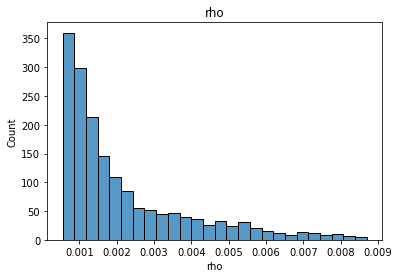

In [112]:
sns.histplot(df, x='rho')
plt.title("rho")

<AxesSubplot:xlabel='optim', ylabel='Count'>

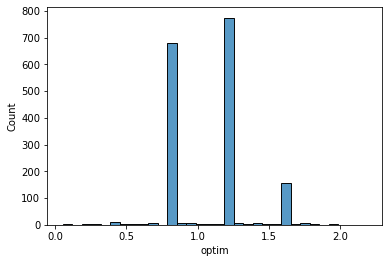

In [113]:
df['optim'] = df['loptim/lres']/df['rho']
sns.histplot(df, x='optim')



In [114]:
df1 = df.drop(columns=['P0', 'optim', 'P0/Pall', 'Psat', 'Lsat', 'loptim','lres', 'loptim/lres', 'Psat/Pall', 'Lsat/lu', 'f', 'rho', 'log'])

In [115]:
df1.tail()

,k,lu,I,gamma,sgamma,r,log0
1877,1.72,1.99,7600.0,10.275051,0.00005,0.00001,-16.247034
1878,1.72,1.99,7600.0,10.165852,0.00005,0.00001,-11.532665
1879,3.29,1.99,4500.0,10.404263,0.00005,0.00001,-11.512708
1880,3.29,1.99,4500.0,10.545341,0.00005,0.00001,-11.653787
1881,3.29,1.99,4500.0,10.275051,0.00005,0.00001,-15.988667


In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1, df['log'], test_size=0.2, random_state=42)

In [117]:
def relative_root_mean_squared_error(true, pred):
    num = np.sum(np.square(true - pred))
    den = np.sum(np.square(true))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


In [118]:

clf1 = RandomForestRegressor(max_depth=20, random_state=0)
clf1.fit(X_train, y_train)
relative_root_mean_squared_error(np.exp(y_test), np.exp(clf1.predict(X_test)))

0.23789270145884528

Try to scale the data. It doesn't make sense. 

In [119]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

clf = RandomForestRegressor(max_depth=20, random_state=0)
clf.fit(X_train, y_train)
relative_root_mean_squared_error(np.exp(y_test), np.exp(clf.predict(X_test)))

0.23724302447386325

Train the classificator for the saturation length.

In [120]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['Lsat/lu'], test_size=0.2, random_state=42)


clf2 = RandomForestRegressor(max_depth=20, random_state=0)
clf2.fit(X_train, y_train)
relative_root_mean_squared_error(y_test, clf2.predict(X_test))

0.11378129276976467

The classificator for the optimum wavelength.

In [121]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['optim'], test_size=0.2, random_state=42)



clf3 = RandomForestRegressor(max_depth=20, random_state=0)
clf3.fit(X_train, y_train)
relative_root_mean_squared_error(y_test, clf3.predict(X_test))

0.21762312659227198

In [122]:
from scipy.special import jv

X = pd.DataFrame({'k':[2.13], 'lu':[2.8], 'I':[53], 'gamma':[np.log(300)], 'sgamma':[0.0002], 
                  'r':[0.00012], 'log0':[2000]})

ksi = X['k']**2/(1+X['k']**2/2)/4
f = jv(0,ksi)-jv(1,ksi)

rho = 1/2/(np.exp(X['gamma']))*(X['I']/X['r']**2/np.pi/4/np.pi/17000*(X['lu']/100*X['k']*f)**2)**(1/3)
X['log0'] = np.log(X['log0']/X['I']/np.exp(X['gamma'])/511000)


print('P_sat=', (np.exp(clf1.predict(X))*np.exp(X['gamma'])*511000*X['I'])[0])
print('L_sat=', (clf2.predict(X)*X['lu'])[0])
print('l_optim=', ((clf3.predict(X)*rho+1)*X['lu']/100/2/np.exp(X['gamma'])/np.exp(X['gamma'])*(1+X['k']*X['k']/2))[0])
print('l_res=', (X['lu']/100/2/np.exp(X['gamma'])/np.exp(X['gamma'])*(1+X['k']*X['k']/2))[0])

P_sat= 19284420.104139604
L_sat= 12.54288
l_optim= 5.108510834057066e-07
l_res= 5.084255555555556e-07


In [123]:
y_pred = clf1.predict(df1)
err = abs(2*(np.exp(y_pred)-df['Psat/Pall'])/(np.exp(y_pred)+df['Psat/Pall']))
err.sort_values()

1805    0.000014
1530    0.000026
324     0.000039
1231    0.000077
118     0.000086
          ...   
449     0.664364
803     0.719504
686     0.940574
464     0.961327
219     1.211270
Name: Psat/Pall, Length: 1707, dtype: float64

In [124]:
y_pred = clf2.predict(df1)
err = abs(2*(y_pred-df['Lsat/lu'])/(y_pred+df['Lsat/lu']))
err.sort_values().tail(20)

116     0.470237
123     0.470584
102     0.495472
1205    0.501025
439     0.503427
50      0.515925
718     0.563082
637     0.571718
1040    0.582230
504     0.586245
629     0.588092
425     0.641803
209     0.687438
690     0.714836
794     0.757536
1148    0.773940
1137    0.841575
712     0.916563
766     0.952782
219     1.371881
Name: Lsat/lu, dtype: float64

In [125]:
y_pred = clf3.predict(df1)
err = abs(2*(y_pred-df['optim'])/(y_pred+df['optim']))
err.sort_values()

1791    0.000003
1736    0.000037
904     0.000051
260     0.000056
1881    0.000061
          ...   
800     1.076717
1393    1.478350
790     1.505559
686     1.714155
705     1.849277
Name: optim, Length: 1707, dtype: float64

Do the same with gradient boosting. 

In [126]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from IPython.display import clear_output

In [127]:
def objective(trial, X_train, y_train, X_test, y_test):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 30),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.1, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'rmse',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = xgb.XGBRegressor(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    accuracy = mean_squared_error(y_test, y_pred)
    return accuracy


def objective_cv(trial):
    fold = KFold(n_splits=3, shuffle=True, random_state=0)
    scores = []
    for i, (train_index, test_index) in enumerate(fold.split(X)):
        scores.append(objective(trial, X.iloc[train_index], y.iloc[train_index],  
                                X.iloc[test_index], y.iloc[test_index]))
        
    return np.mean(scores)
    

In [128]:
X = df1
y = df['log']


In [129]:
study = optuna.create_study(direction='minimize')


[I 2023-04-11 16:04:27,623] A new study created in memory with name: no-name-2a75fc19-b6fc-419a-82ee-724d25953459


In [130]:
study.optimize(objective_cv, n_trials=1000)
clear_output()


In [131]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


Number of finished trials: 1000
Best trial:
  Value: 0.02506566288620118
  Params: 
    max_depth: 2
    learning_rate: 0.3204531193684686
    n_estimators: 490
    min_child_weight: 7
    gamma: 0.0012479712715946303
    subsample: 0.9973616012323248
    colsample_bytree: 0.8506837903599077
    reg_alpha: 5.889117866843498e-06
    reg_lambda: 5.9269743730002e-06


In [132]:
params = trial.params
model1 = xgb.XGBRegressor(**params)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['log'], test_size=0.2, random_state=42)
model1.fit(X_train,y_train)

relative_root_mean_squared_error(np.exp(y_test), np.exp(model1.predict(X_test)))


0.18720455507691414

In [134]:
def scores(trial,X,y):
    fold = KFold(n_splits=5, shuffle=True, random_state=0)
    scores = []
    for i, (train_index, test_index) in enumerate(fold.split(X)):
        params = trial.params
        model = xgb.XGBRegressor(**params)
        model.fit(X.iloc[train_index],y.iloc[train_index])
        scores.append(relative_root_mean_squared_error(np.exp(y.iloc[test_index]),
                                                     np.exp(model.predict(X.iloc[test_index]))))

        
    return np.mean(scores)





print(scores(trial,X,y))
    

0.18248321027506745


In [135]:
X = df1
y = df['Lsat/lu']

In [136]:
study = optuna.create_study(direction='minimize')

[I 2023-04-11 16:11:17,503] A new study created in memory with name: no-name-90cac958-11d5-4917-9bf6-aa0370648d9c


In [137]:
study.optimize(objective_cv, n_trials=1000)
clear_output()


In [138]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 1000
Best trial:
  Value: 0.37051152920293706
  Params: 
    max_depth: 2
    learning_rate: 0.2692075835177909
    n_estimators: 369
    min_child_weight: 3
    gamma: 0.0012625110653873917
    subsample: 0.6267107656907255
    colsample_bytree: 0.9117771168592987
    reg_alpha: 3.4875329369950245e-06
    reg_lambda: 3.329098071712068e-05


In [139]:
params = trial.params
model2 = xgb.XGBRegressor(**params)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['Lsat/lu'], test_size=0.2, random_state=42)

In [141]:
model2.fit(X_train, y_train)
relative_root_mean_squared_error(y_test, model2.predict(X_test))

0.08981150995549787

In [142]:
def scores2(trial,X,y):
    fold = KFold(n_splits=5, shuffle=True, random_state=0)
    scores = []
    for i, (train_index, test_index) in enumerate(fold.split(X)):
        params = trial.params
        model = xgb.XGBRegressor(**params)
        model.fit(X.iloc[train_index],y.iloc[train_index])
        scores.append(relative_root_mean_squared_error((y.iloc[test_index]),
                                                     (model.predict(X.iloc[test_index]))))

        
    return np.mean(scores)





print(scores2(trial,X,y))

0.08853284396291906


In [143]:
X = df1
y = df['optim']

In [144]:
study = optuna.create_study(direction='minimize')

[I 2023-04-11 16:17:59,845] A new study created in memory with name: no-name-84a274ed-b5ea-4014-be22-18022e164ebc


In [145]:
study.optimize(objective_cv, n_trials=1000)
clear_output()


In [146]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 1000
Best trial:
  Value: 0.050156969310830635
  Params: 
    max_depth: 3
    learning_rate: 0.12088373152324808
    n_estimators: 126
    min_child_weight: 7
    gamma: 1.1786857222009519e-07
    subsample: 0.9137734711178351
    colsample_bytree: 0.46988525445605045
    reg_alpha: 0.0027768019123007633
    reg_lambda: 8.084682063767495e-06


In [147]:
params = trial.params
model3 = xgb.XGBRegressor(**params)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['optim'], test_size=0.2, random_state=42)

In [149]:
model3.fit(X_train, y_train)
relative_root_mean_squared_error(y_test, model3.predict(X_test))

0.2119514832407251

In [150]:
def scores2(trial,X,y):
    fold = KFold(n_splits=5, shuffle=True, random_state=0)
    scores = []
    for i, (train_index, test_index) in enumerate(fold.split(X)):
        params = trial.params
        model = xgb.XGBRegressor(**params)
        model.fit(X.iloc[train_index],y.iloc[train_index])
        scores.append(relative_root_mean_squared_error((y.iloc[test_index]),
                                                     (model.predict(X.iloc[test_index]))))

        
    return np.mean(scores)





print(scores2(trial,X,y))

0.20034797608432692


In [151]:
from scipy.special import jv

X = pd.DataFrame({'k':[2.13], 'lu':[2.8], 'I':[53], 'gamma':[np.log(300)], 'sgamma':[0.0002], 
                  'r':[0.0001], 'log0':[2000]})

ksi = X['k']**2/(1+X['k']**2/2)/4
f = jv(0,ksi)-jv(1,ksi)

rho = 1/2/(np.exp(X['gamma']))*(X['I']/X['r']**2/np.pi/4/np.pi/17000*(X['lu']/100*X['k']*f)**2)**(1/3)
X['log0'] = np.log(X['log0']/X['I']/np.exp(X['gamma'])/511000)




print('P_sat=', (np.exp(model1.predict(X))*np.exp(X['gamma'])*511000*X['I'])[0])
print('L_sat=', (model2.predict(X)*X['lu'])[0])
print('l_optim=', ((model3.predict(X)*rho+1)*X['lu']/100/2/np.exp(X['gamma'])/np.exp(X['gamma'])*(1+X['k']*X['k']/2))[0])
print('l_res=', (X['lu']/100/2/np.exp(X['gamma'])/np.exp(X['gamma'])*(1+X['k']*X['k']/2))[0])

P_sat= 29780291.25616885
L_sat= 10.738068866729735
l_optim= 5.11025461617185e-07
l_res= 5.084255555555556e-07


In [152]:
len(df)

1707